In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
import sys
import os
import emoji
from collections import Counter
import pandas as pd
import seaborn as sns
import math
import numpy as np
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split

In [58]:
from sklearn.preprocessing import StandardScaler

In [6]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import initializers

## df_options

In [7]:
# read data
data_file_options = ('options/submissions_reddit.csv')
df_options = pd.read_csv(data_file_options)

In [23]:
print(f' shape: {df_options.shape}')
print(df_options.dtypes)

 shape: (28782, 24)
id                        object
author                    object
created                   object
retrieved                 object
edited                    object
pinned                     int64
archived                   int64
locked                     int64
removed                    int64
deleted                    int64
is_self                    int64
is_video                   int64
is_original_content        int64
title                     object
link_flair_text          float64
upvote_ratio             float64
score                      int64
gilded                     int64
total_awards_received      int64
num_comments               int64
num_crossposts             int64
selftext                  object
thumbnail                 object
shortlink                 object
dtype: object


In [8]:
df_options

,id,author,created,retrieved,edited,pinned,archived,locked,removed,deleted,...,link_flair_text,upvote_ratio,score,gilded,total_awards_received,num_comments,num_crossposts,selftext,thumbnail,shortlink
0,ko2lrl,esInvests,2021-01-01 01:39:43,2021-02-03 21:12:07,1970-01-01 00:00:00,0,0,0,0,0,...,NaN,0.50,0,0,0,4,0,Contrary to popular belief - papertrading is a...,self,https://redd.it/ko2lrl
1,ko3rlt,Hollida4,2021-01-01 03:00:13,2021-02-03 21:12:07,1970-01-01 00:00:00,0,0,0,0,0,...,NaN,0.61,2,0,0,8,0,I bought a few hundred shares of EVGN when it ...,self,https://redd.it/ko3rlt
2,ko4hhe,lsdexperience,2021-01-01 03:52:46,2021-02-03 21:12:07,1970-01-01 00:00:00,0,0,0,0,0,...,NaN,0.60,1,0,0,9,0,If anyone is familiar with this and has helpfu...,self,https://redd.it/ko4hhe
3,ko4t3p,[deleted],2021-01-01 04:16:23,2021-02-03 21:12:07,1970-01-01 00:00:00,0,0,0,1,0,...,NaN,1.00,1,0,0,1,0,[removed],default,https://redd.it/ko4t3p
4,ko4tic,dotobird,2021-01-01 04:17:14,2021-02-03 21:12:07,1970-01-01 00:00:00,0,0,0,0,0,...,NaN,0.64,4,0,0,3,0,Is there a schedule for specific companies as ...,self,https://redd.it/ko4tic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28777,rt5v3a,esInvests,2021-12-31 23:16:51,2022-01-01 07:03:14,1970-01-01 00:00:00,0,0,0,0,0,...,NaN,0.60,4,0,0,5,0,I wrapped up a video walking through the lates...,https://b.thumbs.redditmedia.com/ZJKHVAbrMmeVB...,https://redd.it/rt5v3a
28778,rt60ut,ItalianStallion9069,2021-12-31 23:24:54,2022-01-01 03:27:00,1970-01-01 00:00:00,0,0,0,1,0,...,NaN,1.00,1,0,0,2,0,NaN,https://b.thumbs.redditmedia.com/UZCr6ffC-dBdQ...,https://redd.it/rt60ut
28779,rt62vs,ItalianStallion9069,2021-12-31 23:27:52,2022-01-01 03:27:00,1970-01-01 00:00:00,0,0,0,1,0,...,NaN,1.00,1,0,0,2,0,NaN,https://b.thumbs.redditmedia.com/OoUPkEFPzMfrn...,https://redd.it/rt62vs
28780,rt64xf,ItalianStallion9069,2021-12-31 23:30:49,2022-01-01 03:27:00,1970-01-01 00:00:00,0,0,0,1,0,...,NaN,1.00,1,0,0,2,0,NaN,https://b.thumbs.redditmedia.com/JWU4cgSCACOtR...,https://redd.it/rt64xf


In [25]:
df_options.isna().sum()

id                           0
author                       0
created                      0
retrieved                    0
edited                       0
pinned                       0
archived                     0
locked                       0
removed                      0
deleted                      0
is_self                      0
is_video                     0
is_original_content          0
title                        0
link_flair_text          28782
upvote_ratio                 0
score                        0
gilded                       0
total_awards_received        0
num_comments                 0
num_crossposts               0
selftext                  3351
thumbnail                    0
shortlink                    0
dtype: int64

In [26]:
df_options = df_options.dropna(subset='selftext')

In [27]:
print(df_options.shape)

(25431, 24)


In [28]:
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import nltk

# Download necessary NLTK data
# nltk.download('vader_lexicon')
# nltk.download('punkt')

In [29]:
def get_textblob_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

def get_vader_sentiment(text):
    analyzer = SentimentIntensityAnalyzer()
    scores = analyzer.polarity_scores(text)
    return scores['compound']

In [36]:
df_options.loc[:, 'TextBlob_Sentiment'] = df_options['selftext'].apply(get_textblob_sentiment)
df_options.loc[:, 'VADER_Sentiment'] = df_options['selftext'].apply(get_vader_sentiment)

In [34]:
# pd.options.mode.copy_on_write = False

In [37]:
print(df_options[['selftext', 'TextBlob_Sentiment', 'VADER_Sentiment']].head())

                                            selftext  TextBlob_Sentiment  \
0  Contrary to popular belief - papertrading is a...            0.184295   
1  I bought a few hundred shares of EVGN when it ...            0.040000   
2  If anyone is familiar with this and has helpfu...            0.061201   
3                                          [removed]            0.000000   
4  Is there a schedule for specific companies as ...            0.086607   

   VADER_Sentiment  
0           0.9460  
1          -0.2905  
2           0.9739  
3           0.0000  
4           0.6818  


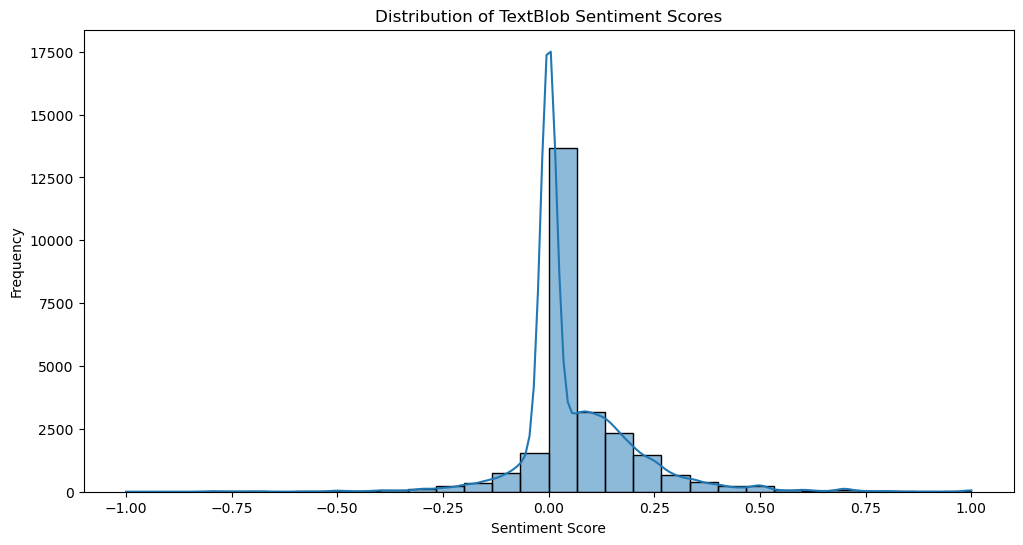

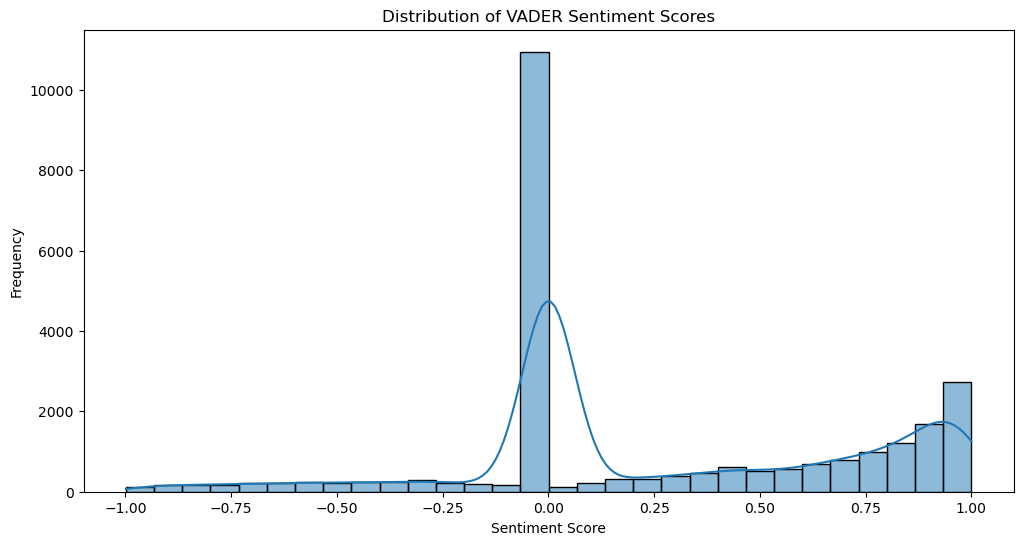

In [38]:
# Plotting the distribution of TextBlob Sentiment
plt.figure(figsize=(12, 6))
sns.histplot(df_options['TextBlob_Sentiment'], bins=30, kde=True)
plt.title('Distribution of TextBlob Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

# Plotting the distribution of VADER Sentiment
plt.figure(figsize=(12, 6))
sns.histplot(df_options['VADER_Sentiment'], bins=30, kde=True)
plt.title('Distribution of VADER Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

# If you have a 'Date' column, plot sentiment trends over time
if 'Date' in df_options.columns:
    df['Date'] = pd.to_datetime(df['Date'])  # Convert to datetime if not already

    # Plot TextBlob Sentiment over time
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=df_options, x='Date', y='TextBlob_Sentiment')
    plt.title('TextBlob Sentiment Over Time')
    plt.xlabel('Date')
    plt.ylabel('Sentiment Score')
    plt.show()

    # Plot VADER Sentiment over time
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=df_options, x='Date', y='VADER_Sentiment')
    plt.title('VADER Sentiment Over Time')
    plt.xlabel('Date')
    plt.ylabel('Sentiment Score')
    plt.show()

interpret the VADER sentiment scores you provided:

0.0000: Neutral sentiment. This score indicates that the text has no strong sentiment, either positive or negative.
0.0000: Again, a neutral sentiment. This could mean that the text is purely factual or balanced in tone.
0.7640: Positive sentiment. This score is quite high, suggesting that the text is strongly positive.
0.6705: Positive sentiment. This score is also indicative of a positive tone, though slightly less strong than 0.7640.
0.4404: Moderately positive sentiment. This score suggests that the text is positive but not overwhelmingly so.

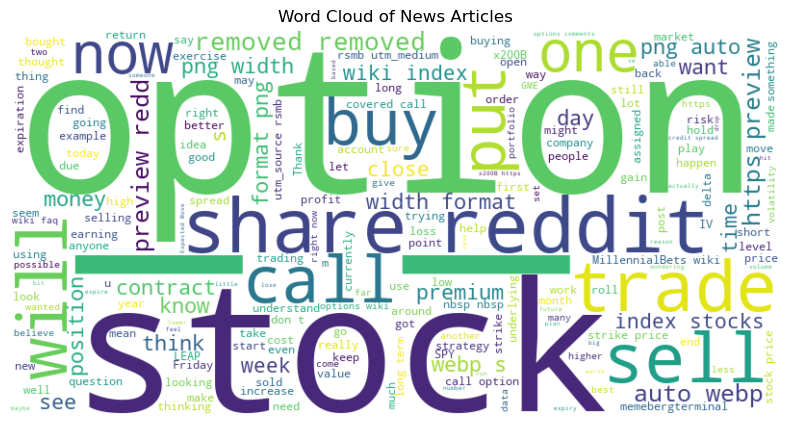

In [42]:
from wordcloud import WordCloud, STOPWORDS

# Combine all the articles into a single string
text = " ".join(selftext for selftext in df_options['selftext'])

# Define stopwords
stopwords = set(STOPWORDS)

# Create the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stopwords).generate(text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off the axis
plt.title("Word Cloud of News Articles")
plt.show()

In [44]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [48]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/melodymassis/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/melodymassis/nltk_data...


True

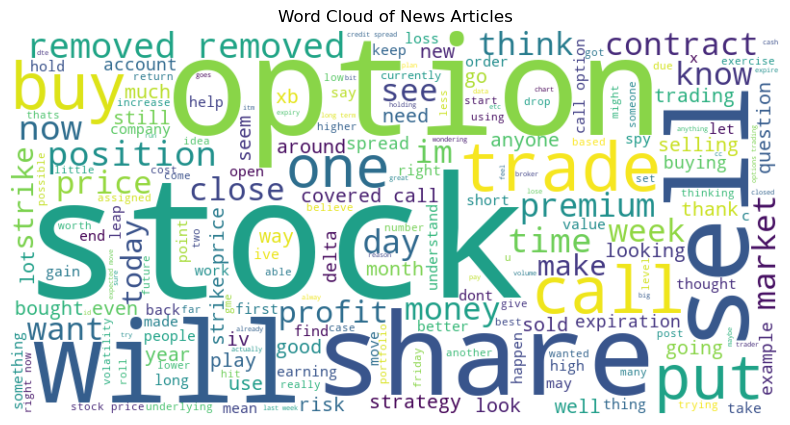

In [53]:
# Define a function to clean the text from unnecessary words
def clean_text(text):
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    # Remove special characters and numbers
    text = re.sub(r'[^A-Za-z\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    return text

# Apply the cleaning function to the selftext column using .loc
df_options.loc[:, 'cleaned_selftext'] = df_options['selftext'].apply(lambda x: clean_text(str(x)))

# Optionally, drop rows with missing cleaned_selftext
df_options = df_options[df_options['cleaned_selftext'].notnull()]

# Combine all the cleaned articles into a single string for the word cloud
cleaned_text = " ".join(selftext for selftext in df_options['cleaned_selftext'])

# Define stopwords for word cloud
stopwords = set(STOPWORDS)

# Create the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stopwords).generate(cleaned_text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off the axis
plt.title("Word Cloud of News Articles")
plt.show()

## Standardizing Numeric Fields

In [54]:
#Examine Numeric Fields
numeric_columns = df_options.dtypes[(df_options.dtypes == 'int64') | (df_options.dtypes == 'float64')].index.values
df_options[numeric_columns]

,pinned,archived,locked,removed,deleted,is_self,is_video,is_original_content,link_flair_text,upvote_ratio,score,gilded,total_awards_received,num_comments,num_crossposts,TextBlob_Sentiment,VADER_Sentiment
0,0,0,0,0,0,1,0,0,NaN,0.50,0,0,0,4,0,0.184295,0.9460
1,0,0,0,0,0,1,0,0,NaN,0.61,2,0,0,8,0,0.040000,-0.2905
2,0,0,0,0,0,1,0,0,NaN,0.60,1,0,0,9,0,0.061201,0.9739
3,0,0,0,1,0,1,0,0,NaN,1.00,1,0,0,1,0,0.000000,0.0000
4,0,0,0,0,0,1,0,0,NaN,0.64,4,0,0,3,0,0.086607,0.6818
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28774,0,0,0,0,0,1,0,0,NaN,0.67,1,0,0,6,0,0.019481,0.9542
28775,0,0,0,1,0,1,0,0,NaN,1.00,1,0,0,1,0,0.000000,0.0000
28776,0,0,0,0,0,1,0,0,NaN,0.85,18,0,0,11,0,0.000000,-0.2500
28777,0,0,0,0,0,1,0,0,NaN,0.60,4,0,0,5,0,0.148016,0.7233


In [56]:
scaling_fields=['upvote_ratio','score','gilded','total_awards_received','num_comments','num_crossposts']
non_scaling_fields = [i for i in df_options.columns if i not in scaling_fields]

In [60]:
scaler = StandardScaler()

df_scaled_values = scaler.fit_transform(df_options[scaling_fields].values)

df_scaled = pd.DataFrame(df_scaled_values, columns=scaling_fields)

In [64]:
df_std = pd.concat((df_options[non_scaling_fields].reset_index(drop=True), df_scaled), axis=1)

## Split Data into training, validation, and test segments.

In [66]:
df_std_y = df_std['score']
df_std = df_std.drop(columns='score')

In [67]:
X_train_temp, X_test, y_train_temp, y_test = train_test_split(df_std, df_std_y, train_size=0.8)
X_train, X_val, y_train, y_val = train_test_split(X_train_temp, y_train_temp, train_size=0.75)

In [68]:
X_train.shape[0] / df_std.shape[0]

0.5999764067476702

In [72]:
df_options.describe()

,pinned,archived,locked,removed,deleted,is_self,is_video,is_original_content,link_flair_text,upvote_ratio,score,gilded,total_awards_received,num_comments,num_crossposts,TextBlob_Sentiment,VADER_Sentiment
count,25431.0,25431.0,25431.000000,25431.000000,25431.000000,25431.000000,25431.000000,25431.0,0.0,25431.000000,25431.000000,25431.000000,25431.000000,25431.000000,25431.000000,25431.000000,25431.000000
mean,0.0,0.0,0.001534,0.382801,0.057725,0.984940,0.000747,0.0,NaN,0.820595,12.115371,0.003578,0.119972,11.581456,0.015454,0.059385,0.266869
std,0.0,0.0,0.039131,0.486080,0.233227,0.121795,0.027324,0.0,NaN,0.217604,108.379065,0.068313,1.197700,36.079382,0.197201,0.140415,0.474511
min,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,0.060000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-0.998800
25%,0.0,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,NaN,0.670000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,0.0,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,NaN,0.920000,1.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000
75%,0.0,0.0,0.000000,1.000000,0.000000,1.000000,0.000000,0.0,NaN,1.000000,3.000000,0.000000,0.000000,11.000000,0.000000,0.114938,0.754300
max,0.0,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,NaN,1.000000,9486.000000,3.000000,69.000000,1166.000000,11.000000,1.000000,0.999900
